In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import fftpack
%pylab inline
plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (22, 6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fftpack', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [81]:
df = pd.read_csv('Data/BMS/Rooms and HVAC/RCU middenhal.csv', delimiter=';', encoding='utf-8')

In [82]:
df_temp = df[['Tijdstip', 'Gemiddelde ruimtetemp [°C] - RCU Middelhal 255 ()']]
df_temp.is_copy = False
df_temp.columns = ['Time', 'Temperature']

In [83]:
df_temp.is_copy = False
df_temp['Time'] = pd.to_datetime(df_temp['Time'], format="%d-%m-%Y %H:%M.%S")

df_temp['Temperature'] = [str(x).replace(',', '.') for x in df_temp['Temperature']]
df_temp['Temperature'] = pd.to_numeric(df_temp['Temperature'], errors='coerce')

In [84]:
df_temp.sort_values(['Time'], inplace=True)

In [85]:
df_temp = df_temp.loc[df_temp['Time'] >= datetime.datetime(2017, 10, 23, 8, 40, 0)]

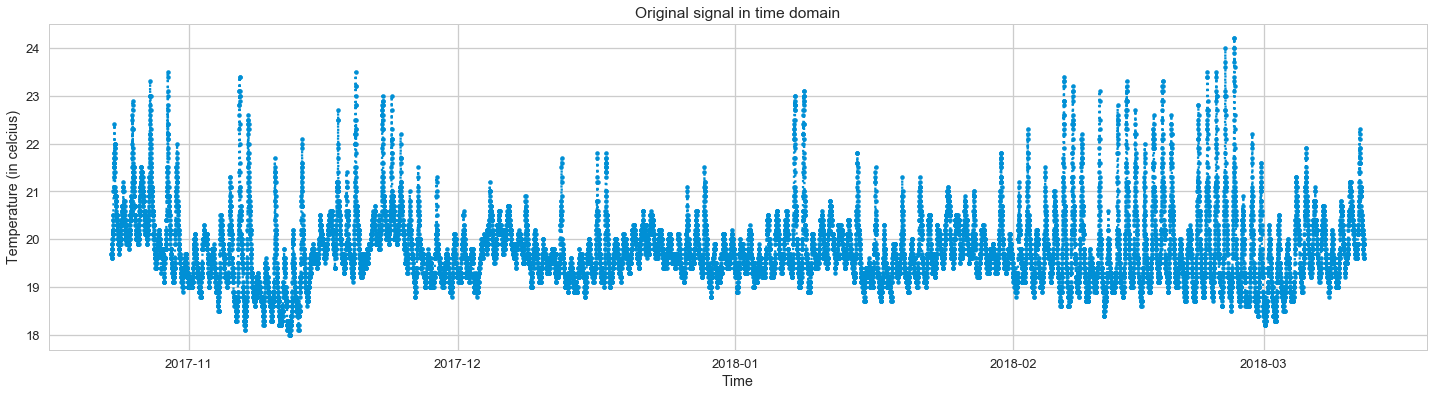

In [86]:
plt.plot(df_temp['Time'], df_temp['Temperature'], linestyle=':', marker='.')
plt.title('Original signal in time domain')
plt.xlabel('Time')
plt.ylabel('Temperature (in celcius)')
plt.show()

In [87]:
demean = lambda df: df - df.mean()
time = pd.DatetimeIndex(df_temp['Time'])
grouped = df_temp.groupby([time.year, time.month, time.day])

In [88]:
def normalize(row, mean):

    return (row - mean)/mean

def scale(row, mean):

    return (row - mean)

norm_df = pd.DataFrame()

for name, group in grouped:
    df_sub = pd.DataFrame(group)
    mean = df_sub['Temperature'].mean()

    df_sub['Temperature_normalized'] = df_sub.apply(lambda row: normalize(row['Temperature'], mean), axis=1)
    df_sub['Temperature_scaled'] = df_sub.apply(lambda row: scale(row['Temperature'], mean), axis=1)
    norm_df = norm_df.append(df_sub)

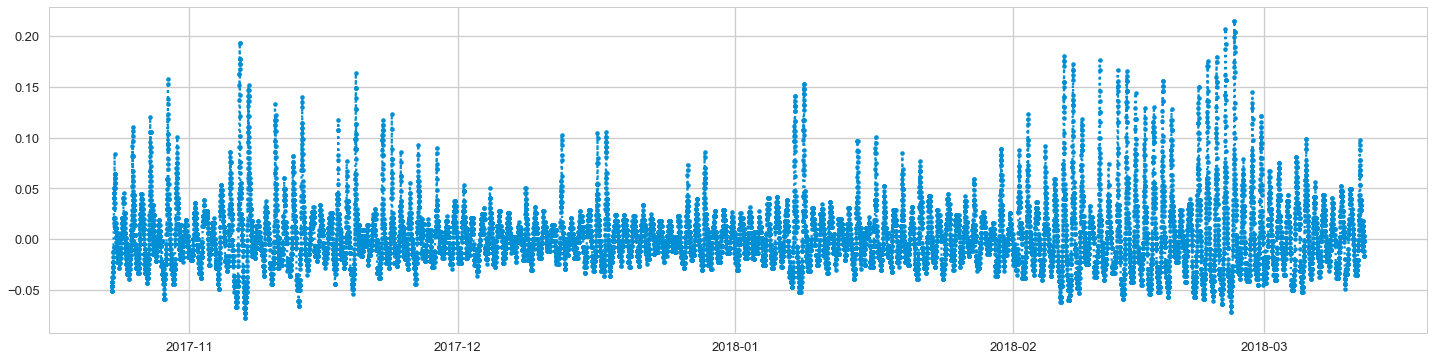

In [89]:
plt.plot(norm_df['Time'], norm_df['Temperature_normalized'], linestyle=':', marker='.')
plt.show()

In [90]:
X = np.fft.fft(norm_df['Temperature_normalized'])

In [91]:
freqs = np.fft.fftfreq(len(norm_df['Temperature_normalized'])) * (1/480)

In [ ]:
plt.stem(freqs, np.abs(X))